<a href="https://colab.research.google.com/github/AhmedAkram392/Gradient_Boosting_Mathematics/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sequential Stage wise addition(as we develop number of models and take the final decision)
its all about if one model make mistakes it will deliever its misatakes in form of feedback to the next model to focus on these mistakes so next model could learn from these mistakes to make better improvement.

In adaboost we do increase in weightage and upsampling.

# Gradient Boosting

if you are working on a regression problem then the first model of gradient boosting will be the mean of target column. Moreover the model is simply a leaf so the value of the leaf is only the mean of target column. It means if we give any input from feature variable the model will give the same value which will be the mean of target variable,
So what we will do will add the one feature into our data which will prediction_1 this column has same values in it which is the mean of target varaiable . After wards, we will check the performance the better way is to use a lose function(actual-prediced) and in gradient boosting it is called as **pseudo-residual**. The lose function will help in measuring the mistakes to pass to the next model. So we will add one more column and this will be pseudo-residual.


Now the next step is to pass these mistakes to the next model. This the main step where gradient boosting come into action.

So the next model will be the decision tree. The basic point here is that we will pass the all feature column to the model but we will not pass the target varaible to the model, we will pass the residual column to the model in place of target variable.

So this means we are actually trying to predict the mistakes made by model 1 by passing the residual data. If the model 2 will able to predict the values(residual) it will able to predict the actuall target variable.

so after making the decision tree will add another column called prediction_2 column in the data and will make precition

# Geometric Intuition

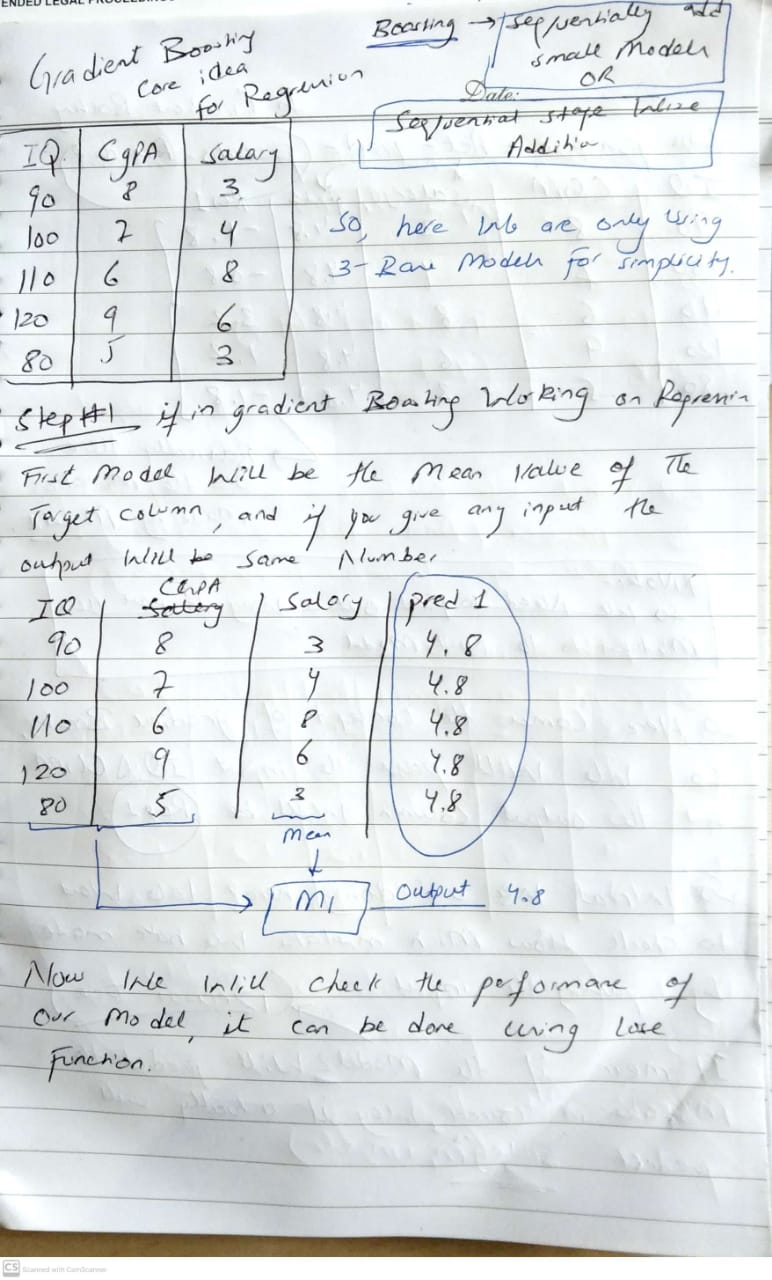

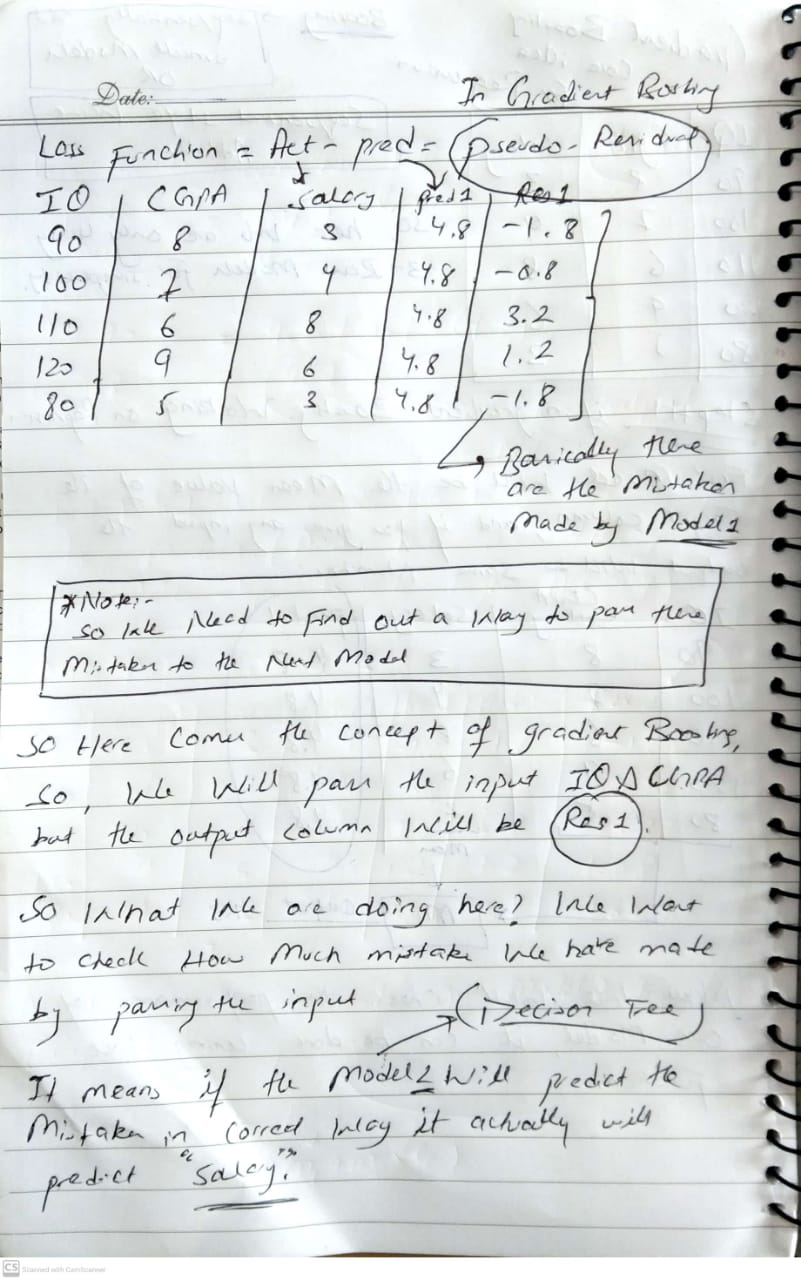

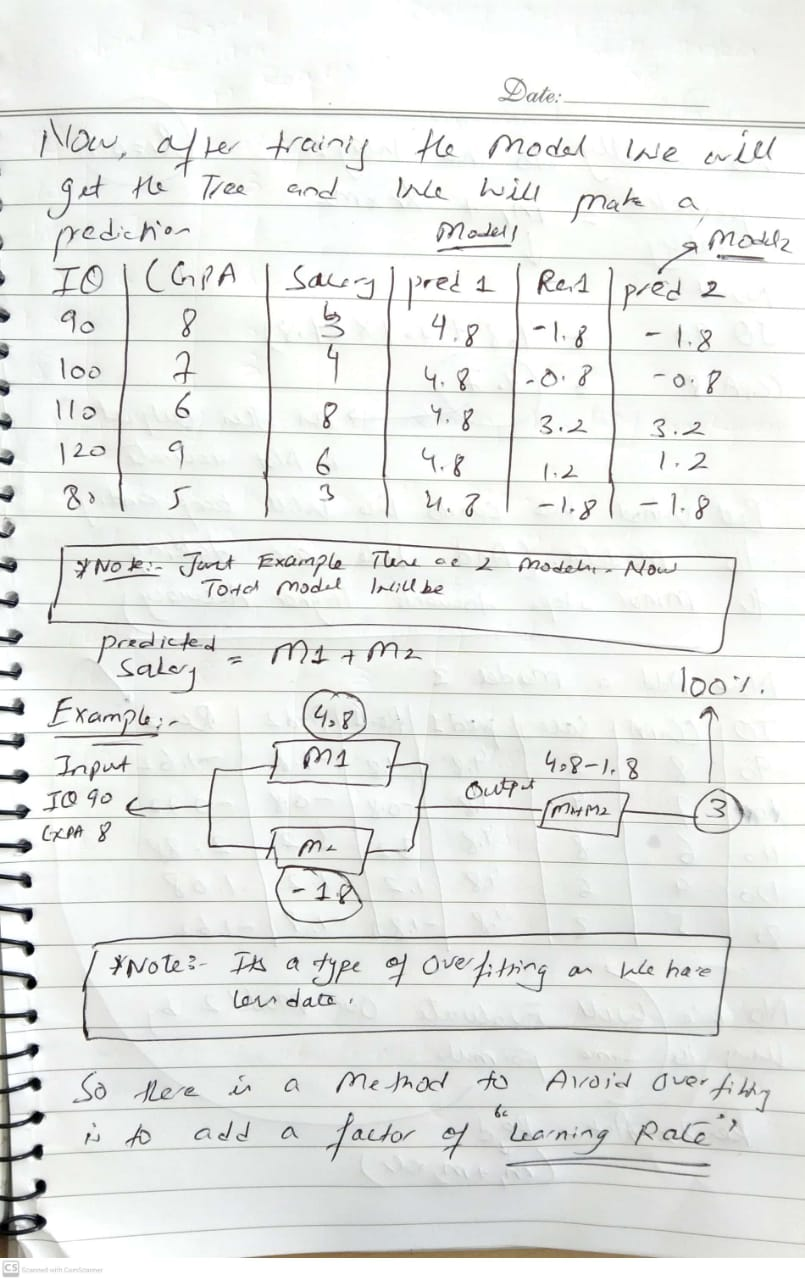

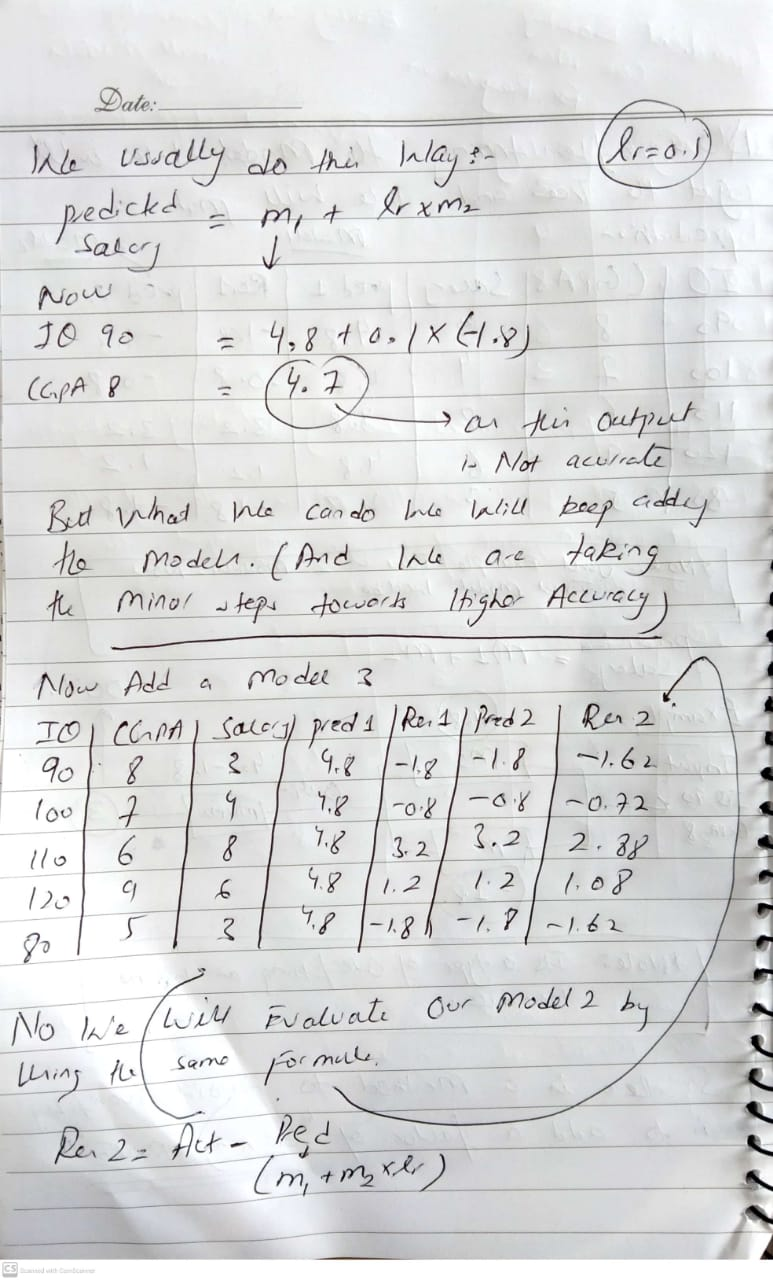

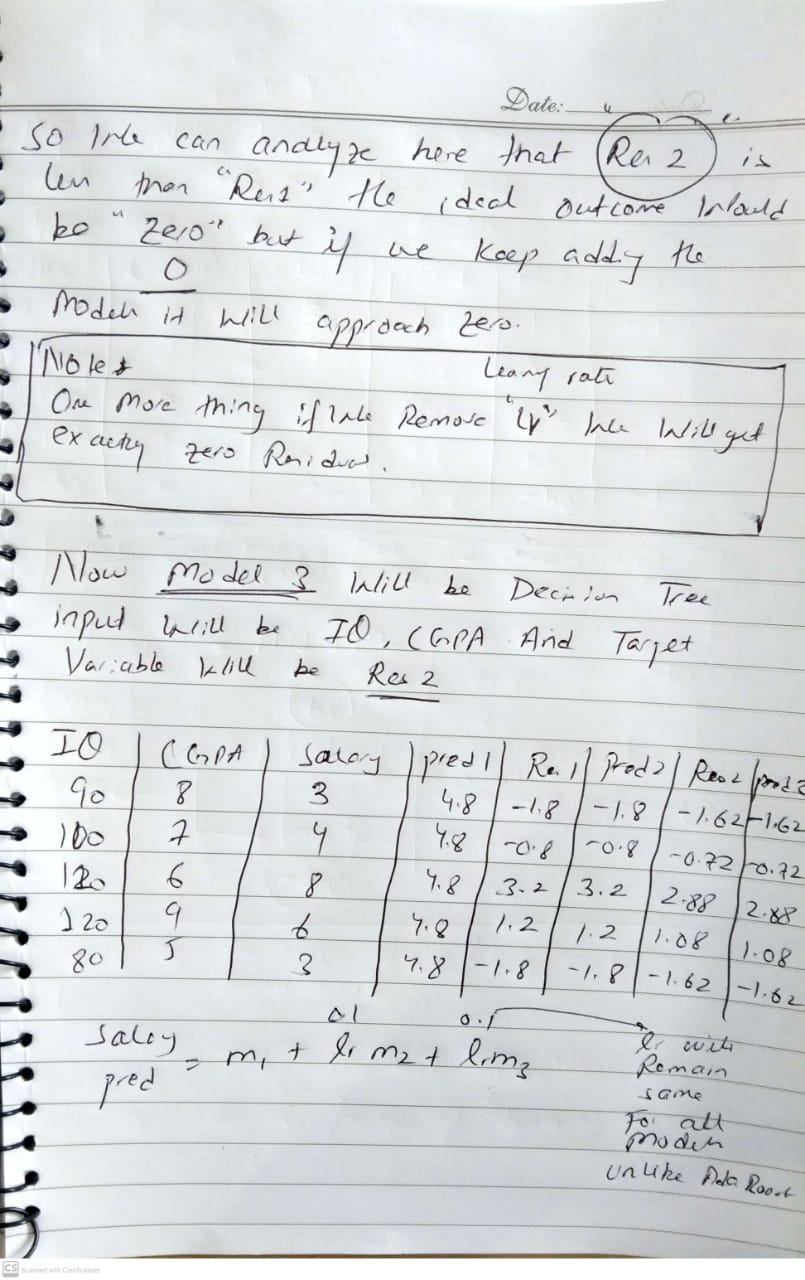

# Code

# Disclaimer
Here is that we are using the default learning rate which is 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
#In NumPy, matrices are commonly represented as nested NumPy arrays.
#rand will generate random numer according to giving dimension rand(5) it will generate the 1D array of 4 numbers, rand(3,5) it will generate the random number of 3 rows and 5 columns
#randint(5) it will generate the one random integer from 0 to 99
#randn(5) Array of defined shape, filled with random floating-point samples from the standard normal distribution.
#np.arrange(6) will generate the array from 0,1,2,3,4,5 np.arrange(4,10) 4,5,6,7,8,9
#x.reshape() it will reshape the x if given one argument will convert the dimension of array into 1D if given two arguments will convert into given two dimension rows and columns
#x.reshape() if you will give -1 it will let reshape to ajust the shape by ownself x.reshape(2,-1) it will think exactlt 2 rows and column it will detect by ownself
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [ ]:
import pandas as pd

df =pd.DataFrame()


In [ ]:
df['X'] = X.reshape(100)
df['y'] = y

df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, ' X vs Y')

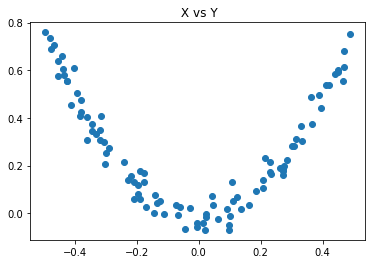

In [ ]:
plt.scatter(df['X'],df['y'])
plt.title(' X vs Y')

# Generate First Model that is nothing the mean value of target variable

In [ ]:
df['pred1'] = df['y'].mean()
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


Calculate the residusal-pseudo and add the column

In [ ]:
df['res1'] = df['y'] - df['pred1']
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


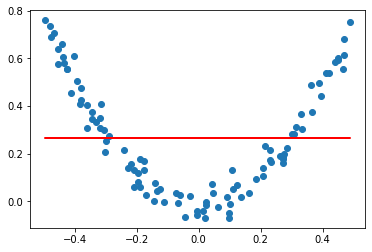

In [ ]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')


# Generating the Second Model that will be the decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)


The point here note is that we have feed the orignal dataset to the model for features but we have passed the target variables which is pseudo-residual (loss function)

In [ ]:
#Values is the properties associated with dataframe and series
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)


DecisionTreeRegressor(max_leaf_nodes=8)

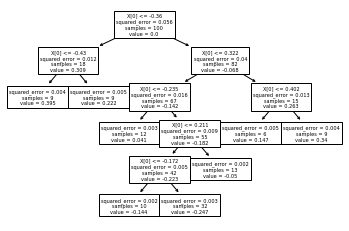

In [ ]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

Now we are generating the test set and making the prediction for our model

In [ ]:
#The numpy.linspace() function returns number spaces evenly w.r.t interval. Similar to numpy.arange() function but instead of step it uses sample number.
X_test = np.linspace(-0.5, 0.5, 500)


The y prediction we calculated is on our test set

In [ ]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))


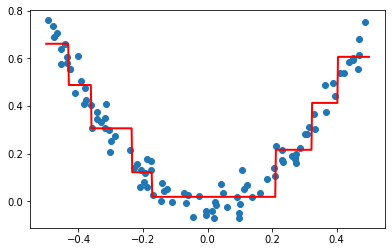

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

Now we are going to add prediction in our datset this prediction will be made on real dataset

In [ ]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


Calculating Pseudo residuals again

if we check the difference in residual 2 and residual 1 we can see it is getting down

In [ ]:
df['res2'] = df['y'] - df['pred2']
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


# Creating third model using Decision Tree

In [ ]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
#As we can see we are passing the orignal feature variable but on the same hand we are passing residuals as the target variable
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)


DecisionTreeRegressor(max_leaf_nodes=8)

In [ ]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])


As we can see the model has teh collected model has improved itself we can see the overfitting on data but we can reduce it the same way we did in adaboost classifier by tardeoff of learning rate and models

Text(0.5, 1.0, 'X vs y')

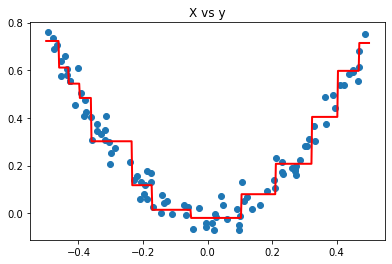

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

Credit : Online Resources